## Thera Bank Personal Loan Campaign

# Data Description:
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

# Domain:
Banking

# Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

# Attribute Information:
* ID : Customer ID
* Age : Customer's age in completed years
* Experience : #years of professional experience
* Income : Annual income of the customer (.000)
* ZIP Code : Home Address ZIP code.
* Family : Family size of the customer
* CCAvg : Avg. spending on credit cards per month (.000)
* Education : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Mortgage : Value of house mortgage if any. (.000)
* Securities Account : Does the customer have a securities account with the bank?
* CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
* Online : Does the customer use internet banking facilities?
* Credit card : Does the customer use a credit card issued by UniversalBank?
---
* Personal Loan : Did this customer accept the personal loan offered in the last campaign?

In [236]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
import os,sys
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [237]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [238]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Column description

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [240]:
df.isnull().values.any() # If there are any null values in data set

False

### Fix incorrect values in "Experience" column

In [241]:
df[df["Experience"] < 0][["Age", "Experience"]] # Check invalid values

,Age,Experience
89,25,-1
226,24,-1
315,24,-2
451,28,-2
524,24,-1
536,25,-1
540,25,-1
576,25,-1
583,24,-1
597,24,-2


In [242]:
minAge = df[df["Experience"] < 0].min()["Age"]
maxAge = df[df["Experience"] < 0].max()["Age"]
print("minAge = " + str(minAge) + "; maxAge = " + str(maxAge))

minAge = 23.0; maxAge = 29.0


In [243]:
avgExperience = np.ceil(df[(df["Experience"] > 0) & (df["Age"] >= minAge) & (df["Age"] <= maxAge)].mean()["Experience"])
avgExperience # avg. experience from minAge to maxAge

3.0

In [244]:
df.loc[df["Experience"] < 0, 'Experience'] = avgExperience

In [245]:
df[df["Experience"] < 0][["Age", "Experience"]] # Check again

,Age,Experience


### Drop columns #1

In [246]:
# Drop this column as it will be 1-1 mapping anyways
df.drop(['ID'], axis=1, inplace=True)

### Convert columns

In [247]:
# Convert Family, Education, "Personal Loan", "Securities Account", "CD Account", "Online", "CreditCard" to categorical variables as relevant
df['Family'] = df['Family'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Personal Loan'] = df['Personal Loan'].astype('category')
df['Securities Account'] = df['Securities Account'].astype('category')
df['CD Account'] = df['Securities Account'].astype('category')
df['Online'] = df['Online'].astype('category')
df['CreditCard'] = df['CreditCard'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null float64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null category
CCAvg                 5000 non-null float64
Education             5000 non-null category
Mortgage              5000 non-null int64
Personal Loan         5000 non-null category
Securities Account    5000 non-null category
CD Account            5000 non-null category
Online                5000 non-null category
CreditCard            5000 non-null category
dtypes: category(7), float64(2), int64(4)
memory usage: 269.4 KB


## Data distribution

In [248]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.150800,11.389539,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


In [249]:
df.corr()

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage
Age,1.000000,0.993668,-0.055269,-0.029216,-0.052012,-0.012539
Experience,0.993668,1.000000,-0.047166,-0.028798,-0.049835,-0.011236
Income,-0.055269,-0.047166,1.000000,-0.016410,0.645984,0.206806
ZIP Code,-0.029216,-0.028798,-0.016410,1.000000,-0.004061,0.007383
CCAvg,-0.052012,-0.049835,0.645984,-0.004061,1.000000,0.109905
Mortgage,-0.012539,-0.011236,0.206806,0.007383,0.109905,1.000000


### Findings #1:
* Older customers have more experience than younger ones.
* Customers with higher income tend to have higher avg. spending on credit cards per month.

### Drop columns #2

In [250]:
df.drop(['Experience'], axis=1, inplace=True) # Drop "Experience" column as it's highly correlated to "Age" column

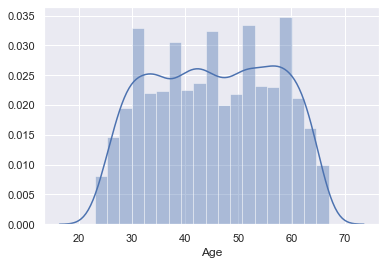

In [251]:
sns.distplot(df["Age"]) # Same distribution for "Experience"

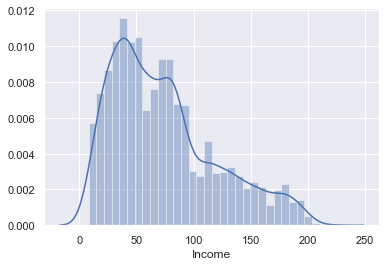

In [252]:
sns.distplot(df["Income"])

In [253]:
df["ZIP Code"].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64

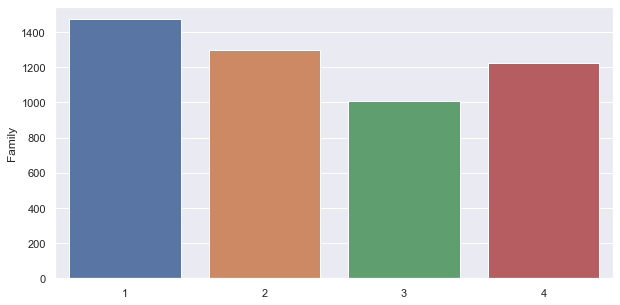

In [254]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x=df["Family"].value_counts().index, y=df["Family"].value_counts())

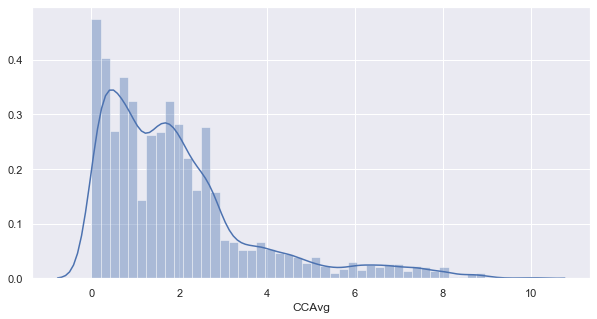

In [255]:
sns.distplot(df["CCAvg"])

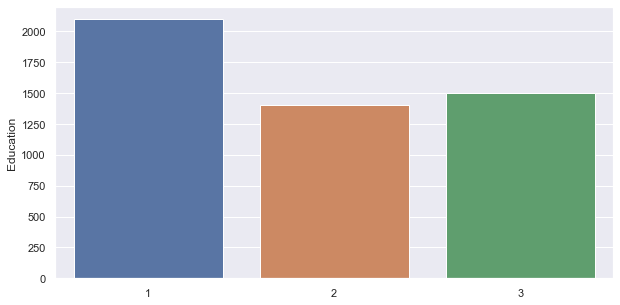

In [256]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x=df["Education"].value_counts().index, y=df["Education"].value_counts())

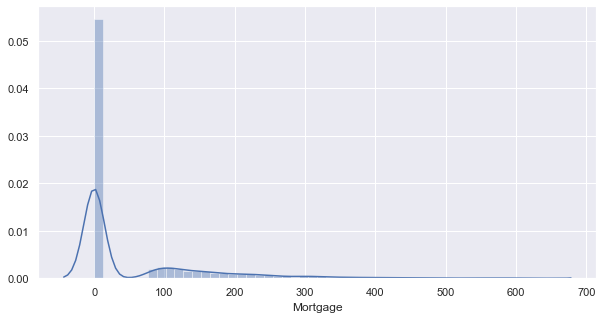

In [257]:
sns.distplot(df["Mortgage"])

### Drop columns #3

In [258]:
df.drop(['Mortgage'], axis=1, inplace=True) # Drop "Mortgage" column as it's highly skewed

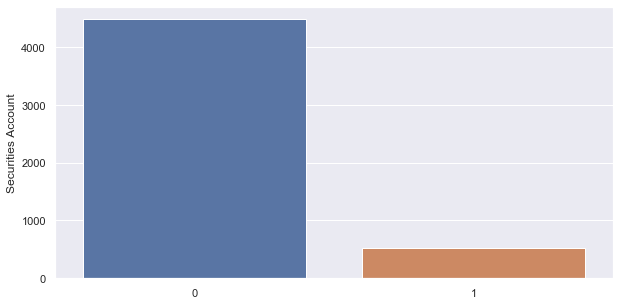

In [259]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x=df["Securities Account"].value_counts().index, y=df["Securities Account"].value_counts())

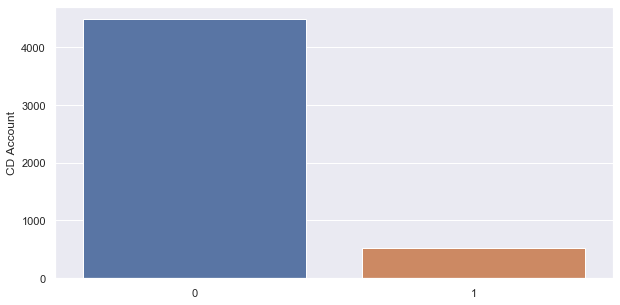

In [260]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x=df["CD Account"].value_counts().index, y=df["CD Account"].value_counts())

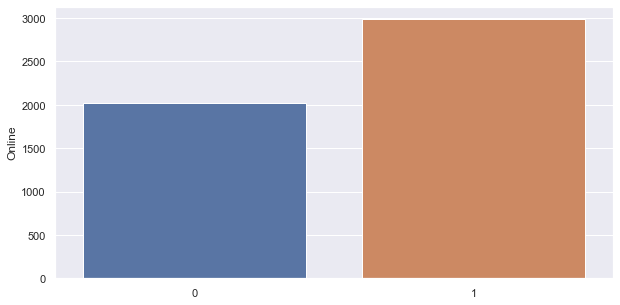

In [261]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x=df["Online"].value_counts().index, y=df["Online"].value_counts())

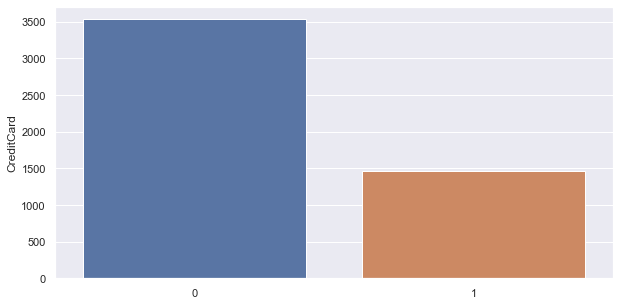

In [262]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x=df["CreditCard"].value_counts().index, y=df["CreditCard"].value_counts())

### Findings #2:
* Lots of customers don't have "Mortgage", "Securities Account", "CD Account" and "Credit Card".
* More customers are using internet banking facilities and are undergraduates.

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
Age                   5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null category
CCAvg                 5000 non-null float64
Education             5000 non-null category
Personal Loan         5000 non-null category
Securities Account    5000 non-null category
CD Account            5000 non-null category
Online                5000 non-null category
CreditCard            5000 non-null category
dtypes: category(7), float64(1), int64(3)
memory usage: 191.3 KB


## Target column distribution

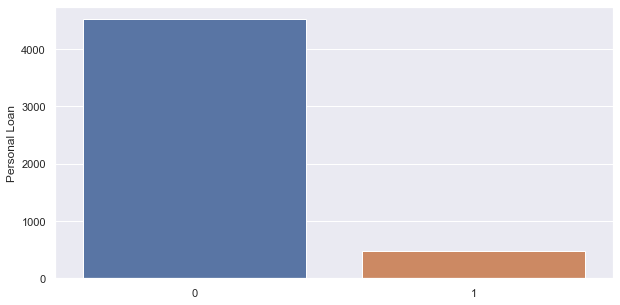

In [264]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x=df["Personal Loan"].value_counts().index, y=df["Personal Loan"].value_counts())

In [265]:
df["Personal Loan"].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

### Findings:
* Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.
* The data is highly skewed.

## Split the data into training and test set in the ratio of 70:30 respectively

In [266]:
# Define X and Y variables
X = df.drop('Personal Loan', axis=1)
Y = df[['Personal Loan']]

In [267]:
# Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [268]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                     5000 non-null int64
Income                  5000 non-null int64
ZIP Code                5000 non-null int64
CCAvg                   5000 non-null float64
Family_2                5000 non-null uint8
Family_3                5000 non-null uint8
Family_4                5000 non-null uint8
Education_2             5000 non-null uint8
Education_3             5000 non-null uint8
Securities Account_1    5000 non-null uint8
CD Account_1            5000 non-null uint8
Online_1                5000 non-null uint8
CreditCard_1            5000 non-null uint8
dtypes: float64(1), int64(3), uint8(9)
memory usage: 200.3 KB


In [282]:
# Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

## Model building using Logistic Regression

In [283]:
model_libnear = LogisticRegression(solver="liblinear", max_iter=1000)
model_libnear.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [284]:
# Predict for train set
pred_train_libnear = model_libnear.predict(X_train)
mat_train_libnear = metrics.confusion_matrix(y_train,pred_train_libnear)
print("confusion matrix libnear = \n", mat_train_libnear)

confusion matrix libnear = 
 [[3100   81]
 [ 222   97]]


In [285]:
model_train_score_libnear = model_libnear.score(X_train, y_train)
model_train_score_libnear

0.9134285714285715

In [286]:
# Predict for test set
pred_test_libnear = model_libnear.predict(X_test)
mat_test_libnear = metrics.confusion_matrix(y_test, pred_test_libnear)
print("confusion matrix libnear = \n", mat_test_libnear)

confusion matrix libnear = 
 [[1300   39]
 [ 117   44]]


In [287]:
model_test_score_libnear = model_libnear.score(X_test, y_test)
model_test_score_libnear

0.896

In [288]:
auc_score = metrics.roc_auc_score(y_test, model_libnear.predict_proba(X_test)[:,1])
round( float( auc_score ), 2 )

0.92

## How can the model perform better?

According to https://stackoverflow.com/questions/38077190/how-to-increase-the-model-accuracy-of-logistic-regression-in-scikit-python:
* Class Imbalance
* Optimize other scores
* Hyperparameter Tuning - Grid Search
* Explore more classifiers
* Error Analysis - Ensemble techniques
* More Features